In [1]:
# подключаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# подключение тренировочной базы данных для скоринговой модели.
data = pd.read_csv("data_train.csv")

# убираем столбцы ‘INPS_mln_sum’ и ‘INPS_yes_no’, axis=1- указывает, что мы хотим удалить столбцы,
# а не строки. Значение 1 указывает на ось столбцов, inplace = True - указывает, что изменения должны 
# быть применены к исходному DataFrame data, а не создан новый DataFrame.
data.drop(["INPS_mln_sum", "INPS_yes_no"], axis=1, inplace=True)

# data.head() - показываем первых 5 строк датасета
data.head()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,Score_level,Score_class,Score_point,Changed_phone_number
0,0,34,1,2,6,2,13,12,1,12,1,0,0,0,-,1
1,0,38,1,1,5,1,10,7,1,13,1,2,0,0,-,1
2,0,35,1,2,4,2,9,8,1,13,4,1,0,0,-,1
3,0,27,1,1,5,2,13,7,1,12,1,2,0,0,-,1
4,0,32,1,2,4,2,10,7,1,13,3,1,0,0,-,1


In [3]:
# Команда вывода информации

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8707 entries, 0 to 8706
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   label                 8707 non-null   int64 
 1   Age                   8707 non-null   int64 
 2   Language              8707 non-null   int64 
 3   Sex                   8707 non-null   int64 
 4   Marital               8707 non-null   int64 
 5   Has_Credit            8707 non-null   int64 
 6   Field                 8707 non-null   int64 
 7   Month_of_birth        8707 non-null   int64 
 8   Day_of_birth          8707 non-null   int64 
 9   Region                8707 non-null   int64 
 10  Number_of_credits     8707 non-null   int64 
 11  Linked_cards          8707 non-null   int64 
 12  Score_level           8707 non-null   int64 
 13  Score_class           8707 non-null   int64 
 14  Score_point           8707 non-null   object
 15  Changed_phone_number  8707 non-null   

In [4]:
df = data

# Замена пропущенные значения
# replace() - меняем все “-” пропущенные значения из датасета в “0”. df[‘score_point’] 
df = df.replace({'-': 0})

#проверям, поменялось ли
df['Score_point']

0         0
1         0
2         0
3         0
4         0
       ... 
8702      0
8703      0
8704      0
8705    237
8706    263
Name: Score_point, Length: 8707, dtype: object

In [5]:
# Меняем все типы данных на числовой integer: 
# присваиваем значение переменной
columns = df.columns 

# цикл, отвечающий за присваивание каждому атрибуту тип integer
for c in list (columns): df[c] = df[c].astype('int64') 

In [6]:
# проверяем, присвоился ли тип данных.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8707 entries, 0 to 8706
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   label                 8707 non-null   int64
 1   Age                   8707 non-null   int64
 2   Language              8707 non-null   int64
 3   Sex                   8707 non-null   int64
 4   Marital               8707 non-null   int64
 5   Has_Credit            8707 non-null   int64
 6   Field                 8707 non-null   int64
 7   Month_of_birth        8707 non-null   int64
 8   Day_of_birth          8707 non-null   int64
 9   Region                8707 non-null   int64
 10  Number_of_credits     8707 non-null   int64
 11  Linked_cards          8707 non-null   int64
 12  Score_level           8707 non-null   int64
 13  Score_class           8707 non-null   int64
 14  Score_point           8707 non-null   int64
 15  Changed_phone_number  8707 non-null   int64
dtypes: int

<AxesSubplot:>

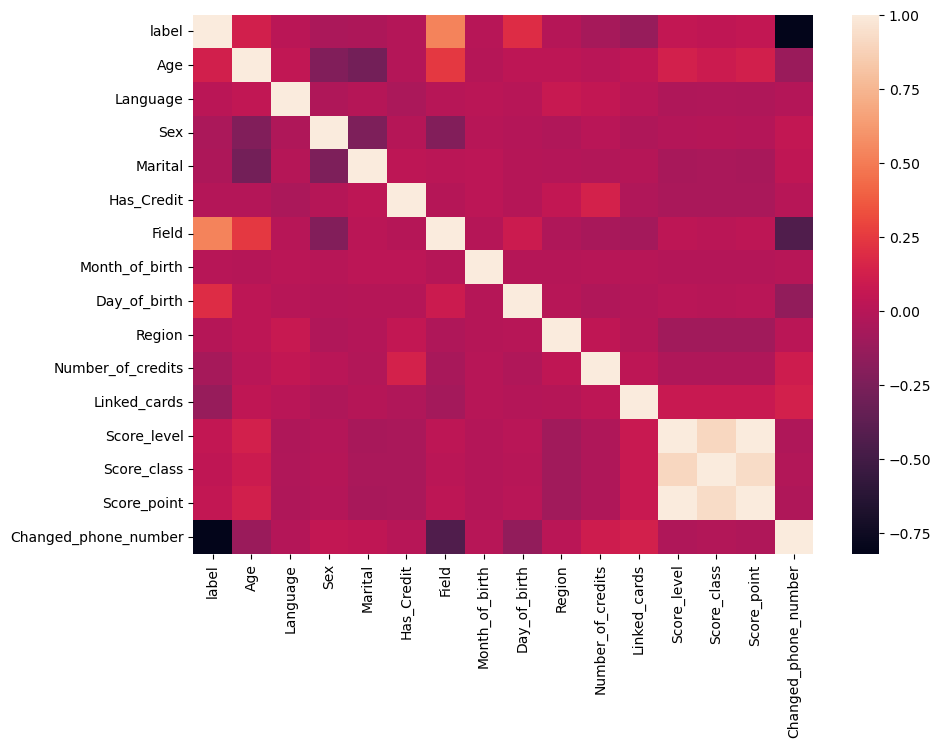

In [7]:
# Графическое обозначение корреляции атрибутов 
# размер сетки графика, 10 рядов по 7 элементов. (отвечает за размер графика)
plt.subplots(figsize=(10, 7))

# Тепловая карта (Heatmap) – способ визуализации статистических данных с помощью цветовой палитры.
# .corr() - отвечает за корреляцию атрибутов конкретного датасета.
sns.heatmap(df.corr())

In [8]:
# Какие и сколько атрибут label имеет значений?
counting_1 = df.pivot_table(columns=['label'], aggfunc="size")
print(counting_1)

label
0     670
1    8037
dtype: int64


Результат вывода. 670 отказов и 8037 одобрений по кредиту

In [9]:
# Разделение данных
Y = df['label']
X = df.drop(['label'], axis=1, inplace=False)

На этом этапе мы подвергаем разделению данных на целевую переменную (y) и набор признаков (X). В df['label'] представлен столбец с целевой переменной, который извлекается из исходного датафрейма df с помощью df['label'].
Далее, df.drop(['label'], axis=1, inplace=False) удаляет столбец 'label' из исходного датафрейма и возвращает новый датафрейм (X), который содержит все остальные признаки.


In [10]:
# Подключение библиотек
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

RandomOverSampler			из		модуля		imblearn.over_sampling		-		класс используется для случайной повторной выборки (oversampling) данных с целью балансировки классов путём увеличения количества образцов в классе. RandomUnderSampler	из		модуля		imblearn.under_sampling	-		класс используется	для	случайной	выборки	(undersampling)	данных	с	целью балансировки		классов	путём		уменьшения	количества		образцов	в
мажоритарном классе.
Counter из модуля collections - этот класс используется для подсчёта количества экземпляров каждого класса в целевой переменной.


In [11]:
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X, Y)

RandomOverSampler - выполняет случайную повторную выборку (oversampling) данных с помощью метода RandomOverSampler из библиотеки imbalanced-learn. Алгоритм oversampling используется для балансировки классов в несбалансированных наборах данных путем увеличения количества образцов в классе (в данном случае класс с меткой 1) до уровня мажоритарного класса (в данном случае класс с меткой 0).
.fit_resample (X, y) - Производится повторная выборка наборов признаков (X) и соответствующих целевых переменных (y) с помощью метода fit_resample(). Он адаптирует оба набора данных X и y таким образом, чтобы классы были сбалансированы. Результатом являются новые наборы признаков (X_ros) и целевых переменных (y_ros) с увеличенным количеством образцов в классе.


In [12]:
# train_test_split из модуля sklearn.model_selection для разделения данных на обучающий и тестовый наборы
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.30, random_state=101)

print(X_train.shape, X_test.shape)

print(y_train.shape, y_test.shape)

(11251, 15) (4823, 15)
(11251,) (4823,)


X_ros и y_ros - представляют собой наборы признаков и соответствующую целевую переменную, разделение на обучающий и тестовый наборы.
test_size - размер тестового набора, заданный в виде десятичной доли или целого числа. 0.30 означает, что 30% данных будут отложены для тестирования.
random_state - задаёт начальное значение генератора псевдослучайных чисел, чтобы обеспечить повторяемость результатов.


In [13]:
# SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = SVC()
model.fit(X_train, y_train)
svm_pred = model.predict(X_test)

# Evaluating Model

print(accuracy_score(y_test, svm_pred).round(3))
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

0.93
[[2358   38]
 [ 298 2129]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2396
           1       0.98      0.88      0.93      2427

    accuracy                           0.93      4823
   macro avg       0.94      0.93      0.93      4823
weighted avg       0.94      0.93      0.93      4823



В представленном коде выполняется обучение модели SVM (Support Vector Machine) с использованием класса SVC из модуля sklearn.svm. Затем модель используется для предсказания классов для тестовых данных.


Создаётся экземпляр модели SVC: model = SVC()
Обучение модели на обучающих данных: model.fit(X_train, y_train) Предсказание классов для тестовых данных:
Вызов метода predict для модели с передачей X_test: svm_pred = model.predict(X_test)


Оценка точности модели с использованием метрики accuracy_score: print(accuracy_score(y_test, svm_pred).round(3))
Вывод матрицы ошибок (confusion matrix) с использованием функции confusion_matrix: print(confusion_matrix(y_test, svm_pred))


Вывод отчёта о классификации (classification report) с использованием функции classification_report: print(classification_report(y_test, svm_pred))


Метрика accuracy_score позволяет оценить точность модели, матрица ошибок показывает количество верно и неверно классифицированных экземпляров для каждого класса, а отчёт о классификации предоставляет информацию о метриках precision, recall, f1-score и support для каждого класса.


In [14]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

regressor = DecisionTreeClassifier(random_state=0)
regressor.fit(X_train, y_train)
Dectree_pred = regressor.predict(X_test)

print(accuracy_score(y_test, Dectree_pred).round(3))
print(confusion_matrix(y_test, Dectree_pred))
print(classification_report(y_test, Dectree_pred))

0.999
[[2396    0]
 [   5 2422]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2396
           1       1.00      1.00      1.00      2427

    accuracy                           1.00      4823
   macro avg       1.00      1.00      1.00      4823
weighted avg       1.00      1.00      1.00      4823



from sklearn.tree import DecisionTreeClassifier - построен на основе решающих правил вида «если, то», упорядоченных в виде дерева и имеющую иерархическую систему.

regressor = DecisionTreeClassifier(random_state = 0) - random_state (во всех функциях и методах из SciKit-Learn) воспроизводит случайные значения.

Приравнивание к нулю, в этом случае, не даёт поменять значения.

regressor.fit(X_train,y_train) - обучение модели на данных.

Dectree_pred = regressor.predict(X_test) - Вызов метода predict для модели с передачей X_test: Dectree_pred = regressor.predict(X_test)
print(accuracy_score(y_test, Dectree_pred).round(3)) - оценка точности дерева.

print(confusion_matrix(y_test, Dectree_pred)) - вывод матрицы ошибок. print(classification_report(y_test, Dectree_pred)) - вывод отчёта.


#### На данном этапе мы проверили работу двух алгоритмов - Decision Tree Classifier и SVC, оба показали себя хорошо, но чтобы протестировать их работу нам нужно загрузить тестовую базу данных, которая покажет, какой из двух алгоритмов сработает лучше.

In [15]:
# Подключение тестовой базы данных 
df2 = pd.read_csv('data_test.csv')

df2.drop(['INPS_mln_sum', 'INPS_yes_no'], axis=1, inplace=True)
df2.head()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,Score_level,Score_class,Score_point,Changed_phone_number
0,0,40,1,2,4,1,0,3,1,12,2,1,0,0,-,1
1,0,36,2,2,4,1,0,5,1,13,1,2,0,0,-,1
2,0,31,1,2,4,1,0,7,1,13,1,1,0,0,-,2
3,0,29,1,2,4,1,0,1,1,13,1,1,0,0,-,1
4,0,38,1,2,4,1,0,10,1,13,1,2,4,2,318,1


Подключение	тестовой	базы	данных	проходит	также,	как	и
тренировочной, с одним отличием - название меняем на df2.

In [16]:
# Замена пустых ячеек
df2 = df2.replace({'-': 0})
df2['Score_point'].head()

0      0
1      0
2      0
3      0
4    318
Name: Score_point, dtype: object

In [17]:
New_Y = df2['label']
New_X = df2.drop(['label'], axis = 1, inplace=False)
New_X.head()

,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,Score_level,Score_class,Score_point,Changed_phone_number
0,40,1,2,4,1,0,3,1,12,2,1,0,0,0,1
1,36,2,2,4,1,0,5,1,13,1,2,0,0,0,1
2,31,1,2,4,1,0,7,1,13,1,1,0,0,0,2
3,29,1,2,4,1,0,1,1,13,1,1,0,0,0,1
4,38,1,2,4,1,0,10,1,13,1,2,4,2,318,1


In [18]:
# Проверяем работу алгоритма DecisionTreeClassifier
Dectree_new = regressor.predict(New_X)

print(accuracy_score(New_Y, Dectree_new).round(3))
print(confusion_matrix(New_Y, Dectree_new))
print(classification_report(New_Y, Dectree_new))

1.0
[[26  0]
 [ 0 22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [19]:
# Проверяем работу алгоритма SVC
svm_new = model.predict(New_X)

print(accuracy_score(New_Y, svm_new).round(3))
print(confusion_matrix(New_Y, svm_new))
print(classification_report(New_Y, svm_new))

0.896
[[26  0]
 [ 5 17]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       1.00      0.77      0.87        22

    accuracy                           0.90        48
   macro avg       0.92      0.89      0.89        48
weighted avg       0.91      0.90      0.89        48



### Визуальное представление

Text(0.5, 1.0, 'Одобрение кредита')

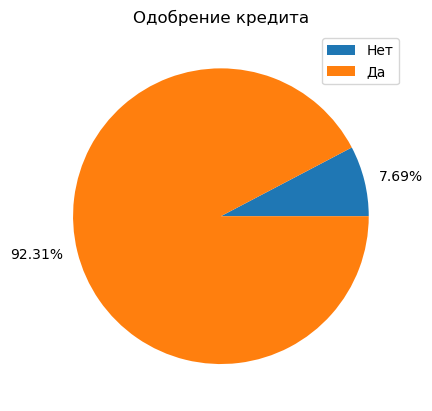

In [20]:
# Круговая диаграмма

term_deposit = np.array([len(data[data['label'] == 0]), len(data[data['label'] == 1])])
mylabel = ['Нет', 'Да']

myprec = np.array([str(round(term_deposit[0] / len(data['label']) * 100, 2)) + '%',
                   str(round(term_deposit[1] / len(data['label']) * 100, 2)) + '%'])

plt.pie(term_deposit, labels=myprec)
plt.legend(mylabel)
plt.title('Одобрение кредита')

import matplotlib.pyplot as plt - подключение библиотеки matplotlib для круговой диаграммы

term_deposit = np.array([len(data[data['label']== 0]), len(data[data['label']
== 1])]) - представляет собой массив, содержащий количество записей в данных, где значение "label" равно 0 (нет одобрения кредита) и где значение "label" равно 1 (одобрение кредита).

mylabel = ['нет','да'] - даёт название элементам в списке с метками для круговой диаграммы, где "нет" соответствует значению 0 и "да" соответствует значению 1.

myprec = np.array([str(round(term_deposit[0] / len(data['label']) * 100,2)) + '%', str(round(term_deposit[1] / len(data['label'])* 100,2)) + '%']) - массив, содержащий процентное соотношение количества записей с одобрением и отказом кредита от общего количества записей в данных. Значения процентов округлены до двух знаков после запятой и представлены в виде строки с символом процента.

plt.pie(term_deposit, labels = myprec) - создает круговую диаграмму, используя значения из term_deposit в качестве данных и метки из myprec для отображения процентного соотношения. Каждый сектор диаграммы представляет одну из категорий: "нет" или "да".

plt.legend(mylabel) - добавляет легенду к диаграмме, отображая соответствие между метками и цветами секторов.

plt.title('Одобрение кредита') - задаёт заголовок для круговой диаграммы. В данном случае, заголовок указывает на тему анализа - "Одобрение кредита".


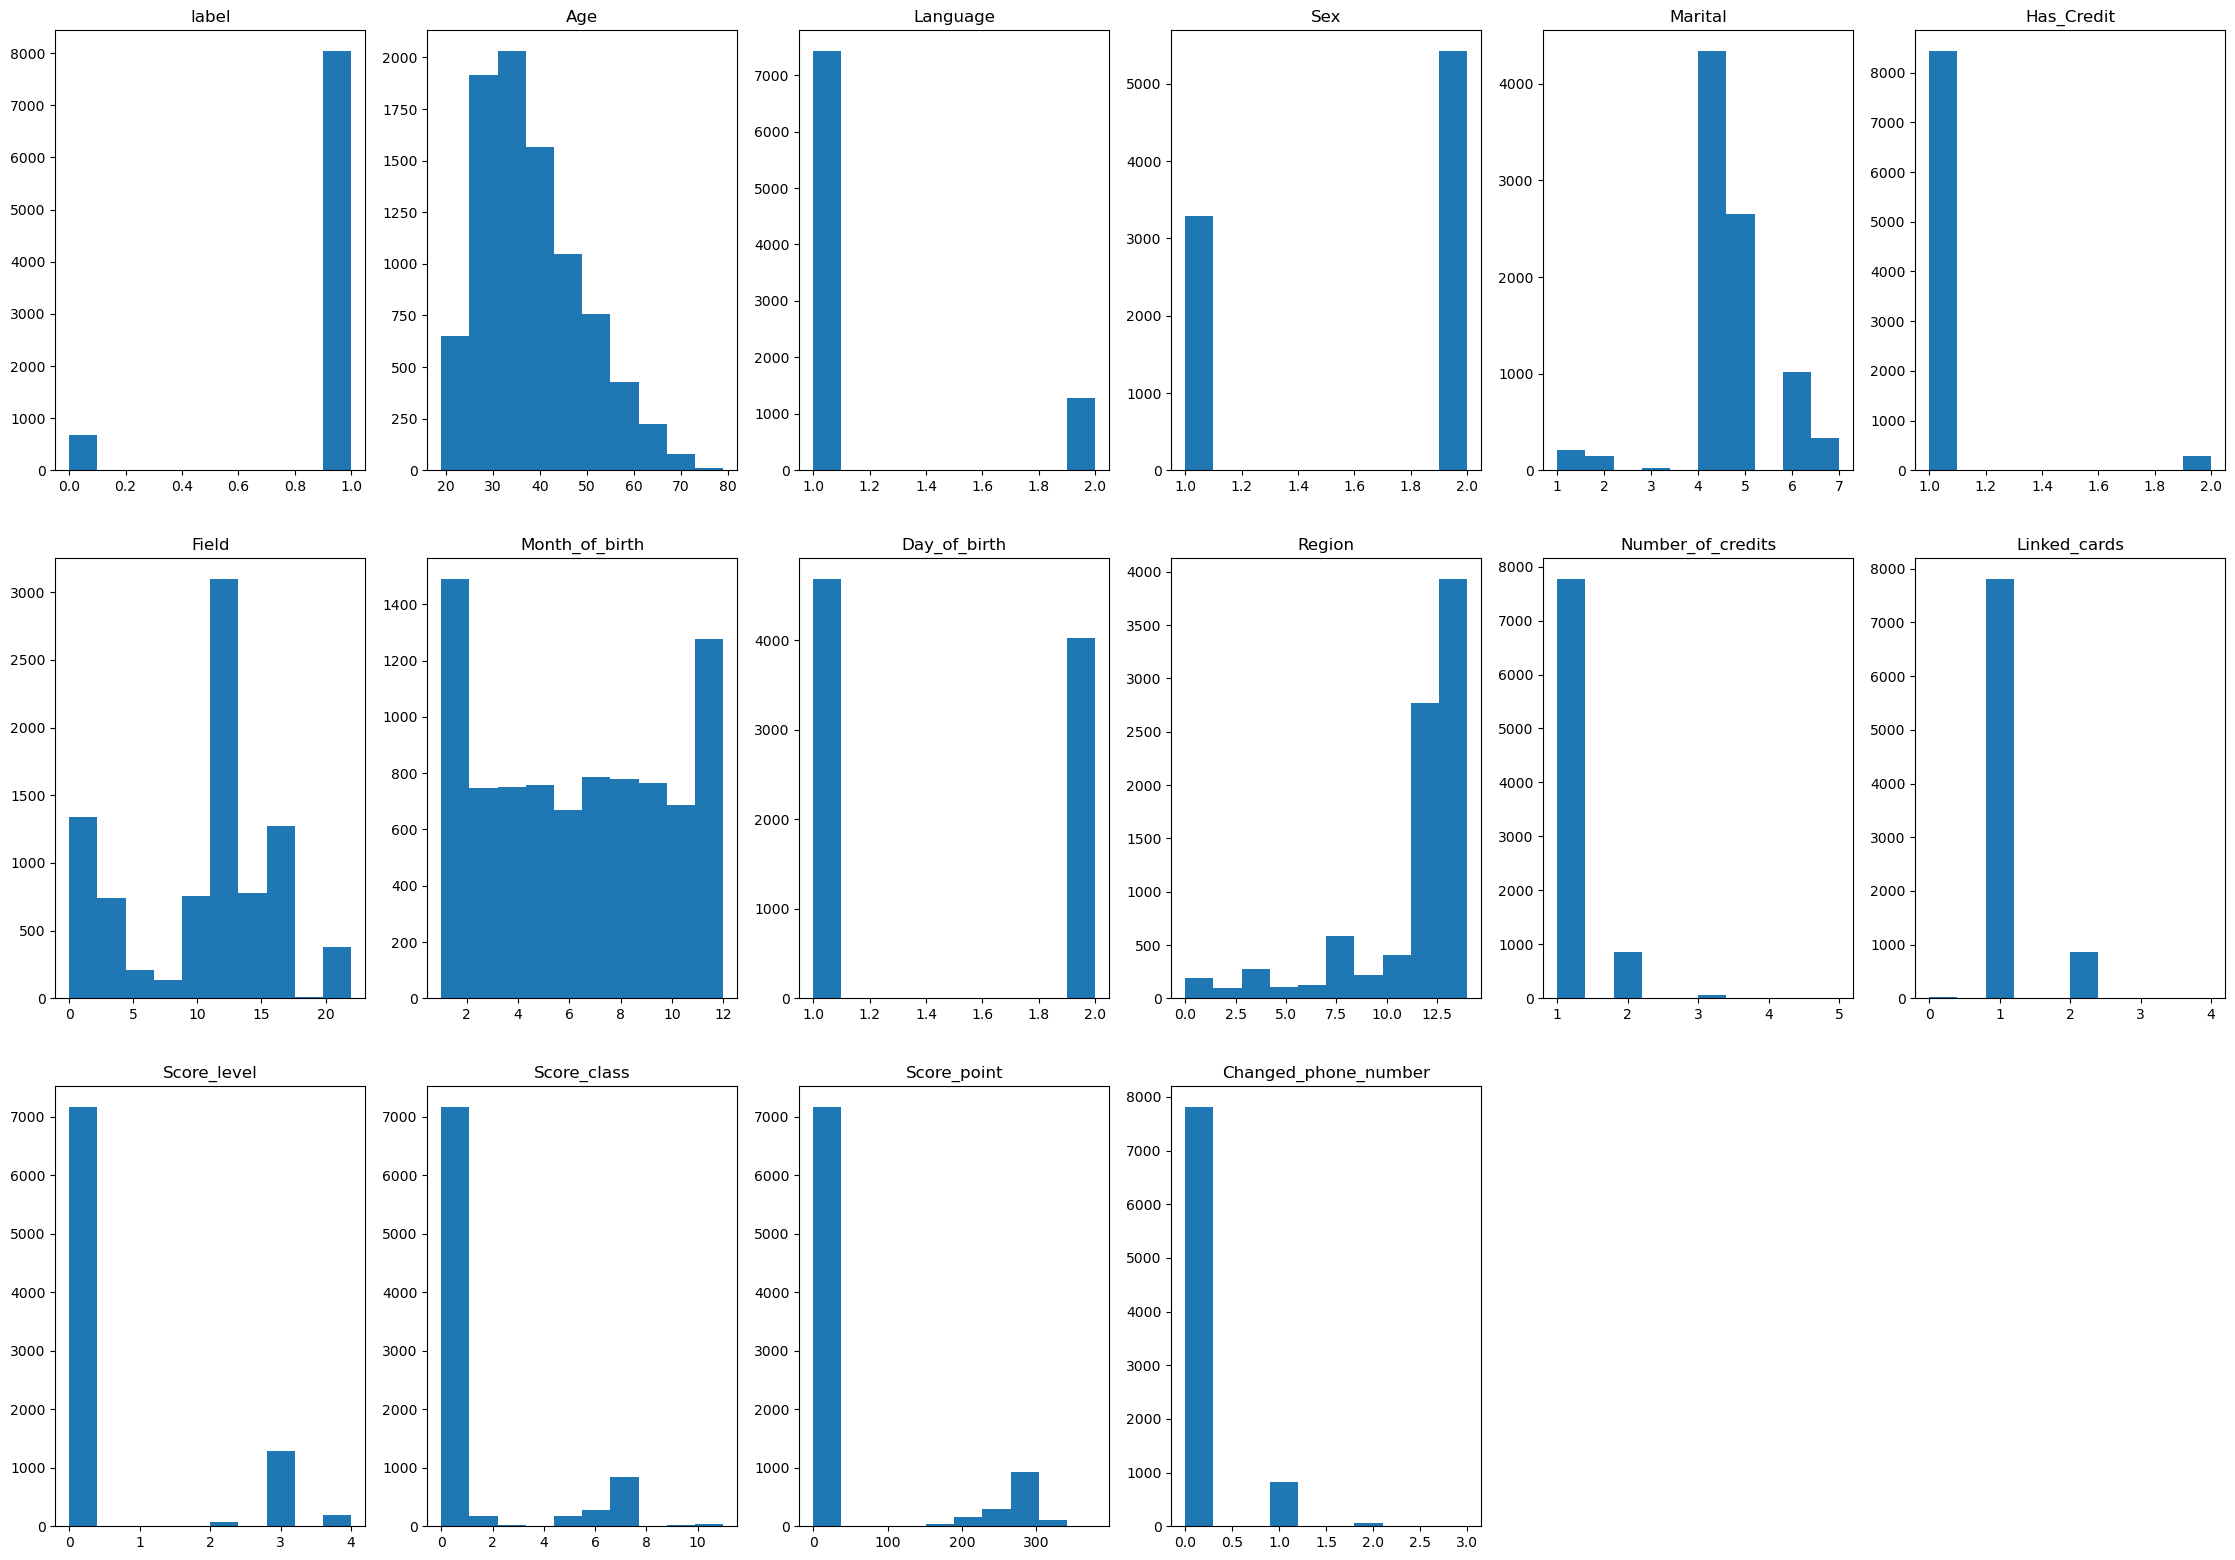

In [21]:
# Визуальное представление атрибутов

def plot_distributions(df):
    plt.figure(figsize=(28, 40))

    b = 0
    for i in df.columns:
        b += 1
        plt.subplot(6, 6, b)
        plt.hist(df[i])
        plt.title(i)


def plot_individual(column_name, df=data):
    plt.figure(figsize=(15, 10))
    plt.hist(df[column_name])
    plt.title(column_name)


plot_distributions(df)

def plot_distributions(df) - используется для построения гистограмм распределения значений для каждого столбца в базе данных df.

plt.figure(figsize=(28,40)) - создает новую фигуру (график) с указанными размерами 28x40 дюймов.

Переменная b инициализируется 0 для начала счётчика.

Цикл for i in df.columns перебирает каждый столбец в базе данных. b+=1 увеличивает значение b на 1 при каждой итерации цикла для обновления номера подграфика.

plt.subplot(6,6,b) - создает подграфик на общей области размером 6x6 с номером, соответствующим текущему значению b.

plt.hist(df[i]) - строит гистограмму распределения значений столбца i в базе данных df.

plt.title(i) - задает заголовок подграфика, соответствующий имени столбца i.

def plot_individual(column_name, df=data) - используется для построения гистограммы распределения значений для указанного столбца column_name в базе данных df.

 
plt.figure(figsize=(15,10)) - создает новую фигуру (график) с указанными размерами 15x10 дюймов.

plt.hist(df[column_name]) - строит гистограмму распределения значений для указанного столбца column_name в датафрейме df.

plt.title(column_name) - задаёт заголовок гистограммы, соответствующий имени столбца column_name.

plot_distributions(df) - вызывает функцию plot_distributions() для построения гистограмм распределения значений для каждого столбца в базе данных df. Графики распределения будут отображены на одной общей фигуре размером 28x40 дюймов с использованием подграфиков размером 6x6.


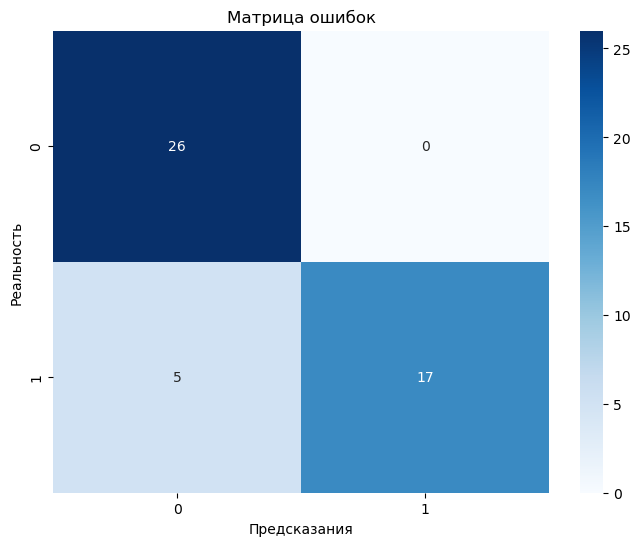

In [22]:
# Код для графического вывод матрицы ошибок

plt.figure(figsize=(8, 6)) 

sns.heatmap(confusion_matrix(New_Y, svm_new), annot=True, fmt="d", cmap="Blues") 

plt.title("Матрица ошибок")

plt.xlabel("Предсказания")

plt.ylabel("Реальность")

plt.show()